# `reaction_system` tutorial

[*The tutorial is also available as a plain script file here: [examples/robertson.m](./examples/robertson.m).*]

We will work with the standard Robertson autocatalytic reaction system, which is used as a test for stiff ODE solvers (see https://uk.mathworks.com/help/matlab/ref/ode15s.html).

The reactions are:

$$
A \rightarrow B,  \quad k_1 = 0.04
$$

$$
B + B  \rightarrow B + C, \quad k_2 = 3\cdot 10^7 
$$

$$
B + C \rightarrow A + C,  \quad k_3 = 10^4 
$$

Note the large magnitude difference between the $k_i$ which makes the system stiff.

We will integrate the system from $t=0$ to $t=10^8$ with initial condition $ [A]_0=1, [B]_0=[C]_0=0 $.

## Define the network

For this we have to instantiate a ``reaction_system`` object and use the function ``add_reaction`` to build up the network. The syntax is:
```
add_reaction(obj, reaction_string, k+, k-)
```
The backward coefficient is optional. 

In [1]:
clear
addpath('./m');
R = reaction_system();
add_reaction(R, 'A = B', 0.04);
add_reaction(R, 'B + B  = B + C ', 3e7);
add_reaction(R, 'B + C  = A + C ', 1e4);

Now we can check the system we created:

In [2]:
disp(R)

(1) A -> B           R= 4.0e-02*[A]
(2) B + B -> B + C   R= 3.0e+07*[B]*[B]
(3) B + C -> A + C   R= 1.0e+04*[B]*[C]
 
d[A]/dt = -R(1)+R(3)
d[B]/dt = +R(1)-R(2)-R(3)
d[C]/dt = +R(2)


## Integrate the ODE system
Next, we integrate the system using the stiff solver ``ode15s``. Note that the ODE function to integrate is automatically generated by ``ode_func(R)`` which returns a function handle.

In [2]:
options = odeset('Mass',eye(3),...
    'RelTol',1e-6,...
    'AbsTol',1e-12); 
tspan = [0 logspace(-6,8,120)];
tic  
[t,x] = ode15s(ode_func(R),tspan,[1 0 0]',options); 
toc

Elapsed time is 0.0745831 seconds.


And finally we want to plot the output. 

However, it is known that [B], as an intermediate product, has a much smaller concentration. 

Thus, we seek out the corresponding data column for [B] and multiply it by a factor.

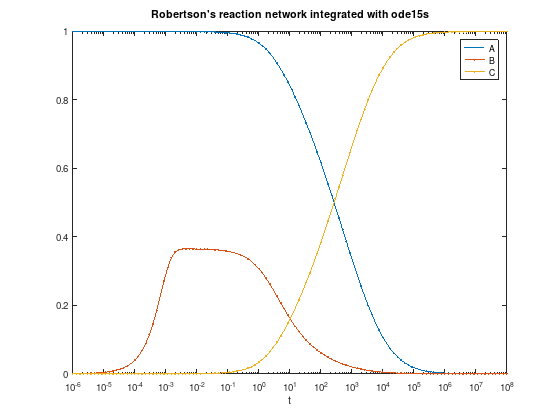

In [3]:
i = R.Reactants('B');
x(:,i) = x(:,i)*1e4;
semilogx(t(2:end),x(2:end,:),'.-')
legend(R.Reactants.keys)
title("Robertson's reaction network integrated with ode15s")
xlabel('t')


We used here the member variable ``reaction_system.Reactants`` which is a [containers.Map](https://uk.mathworks.com/help/matlab/map-containers.html) object. It reflects the mapping: (name of species)->(index of species).

``R.Reactants.keys`` returns the names of all reacting species as a cell array while ``R.Reactants.values`` the corresponding indices.

## Running the tutorial

This tutorial was created as a Jupyter notebook. It is also available with more code as a script in the file [examples/robertson.m](./examples/robertson.m).

To run it, just make sure that ``reaction_system.m`` is in your MATLAB path. This can be done by, e.g., running ``addpath('./m')`` at the MATLAB command prompt. 

## Next steps

More information on how to use this package can be found in the ``examples`` and reading the comments in the source file.